### Stock Market Clustering

In this project we will be extracting live Stock Market data from yahoo finance. We will find similarities amongst various companies using their stock stock market prices and then cluster them into different clusters

In [32]:
from pandas_datareader import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [4]:
companies_dict = {
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Walgreen':'WBA',
    'Northrop Grumman':'NOC',
    'Boeing':'BA',
    'Lockheed Martin':'LMT',
    'McDonalds':'MCD',
    'Intel':'INTC',
    'IBM':'IBM',
    'Texas Instruments':'TXN',
    'MasterCard':'MA',
    'Microsoft':'MSFT',
    'General Electrics':'GE',
    'American Express':'AXP',
    'Pepsi':'PEP',
    'Coca Cola':'KO',
    'Johnson & Johnson':'JNJ',
    'Toyota':'TM',
    'Honda':'HMC',
    'Exxon':'XOM',
    'Chevron':'CVX',
    'Valero Energy':'VLO',
    'Ford':'F',
    'Bank of America':'BAC',
    'Tesla':'TSLA'}

In [5]:
data_source = 'yahoo' # Source of data is yahoo finance.
start_date = '2015-04-25'
end_date = '2021-10-10'
df = data.DataReader(list(companies_dict.values()),
 data_source,start_date,end_date)

In [28]:
df.head()

Attributes   Adj Close                                                \
Symbols           AMZN       AAPL        WBA         NOC          BA   
Date                                                                   
2015-04-24  445.100006  29.604244  71.404724  144.828568  130.596802   
2015-04-27  438.559998  30.142797  71.521004  143.351486  130.068741   
2015-04-28  429.309998  29.667864  71.487747  143.691666  129.813553   
2015-04-29  429.369995  29.231585  70.233734  142.465225  128.616745   
2015-04-30  421.779999  28.438522  68.871765  137.899582  126.143791   

Attributes                                                           ...  \
Symbols            LMT        MCD       INTC         IBM        TXN  ...   
Date                                                                 ...   
2015-04-24  162.848068  82.708099  26.727932  121.224724  45.874809  ...   
2015-04-27  161.572784  80.781532  27.077866  121.903030  46.570511  ...   
2015-04-28  161.722778  81.108208  27.511105  124.180740  46.460876  ...   
2015-04-29  159.447250  81.267365  27.402796  124.523460  46.401836  ...   
2015-04-30  155.537994  80.873672  27.119516  122.302841  45.718716  ...   

Attributes      Volume                                               \
Symbols             KO         JNJ        TM        HMC         XOM   
Date                                                                  
2015-04-24  11623300.0   6566900.0  277500.0   824800.0   8405700.0   
2015-04-27  10044600.0   9113900.0  273000.0   557200.0  10534600.0   
2015-04-28  12174800.0   7484600.0  421900.0  2455300.0   9633800.0   
2015-04-29  11371400.0   8926200.0  282900.0  1481400.0  12534100.0   
2015-04-30  12700800.0  10170600.0  246800.0   750000.0  13947700.0   

Attributes                                                             
Symbols           CVX        VLO           F          BAC        TSLA  
Date                                                                   
2015-04-24  4995000.0  5277700.0  20293300.0   40766100.0  12139000.0  
2015-04-27  4858700.0  8056400.0  34824900.0   73523400.0  58363000.0  
2015-04-28  5321600.0  7905400.0  56634200.0   58080100.0  30427000.0  
2015-04-29  5665800.0  6002600.0  35126900.0  134499400.0  19680500.0  
2015-04-30  6666800.0  8067500.0  30269300.0   78313900.0  19559500.0  

[5 rows x 150 columns]

In [30]:
df.columns.tolist()

[('Adj Close', 'AMZN'),
 ('Adj Close', 'AAPL'),
 ('Adj Close', 'WBA'),
 ('Adj Close', 'NOC'),
 ('Adj Close', 'BA'),
 ('Adj Close', 'LMT'),
 ('Adj Close', 'MCD'),
 ('Adj Close', 'INTC'),
 ('Adj Close', 'IBM'),
 ('Adj Close', 'TXN'),
 ('Adj Close', 'MA'),
 ('Adj Close', 'MSFT'),
 ('Adj Close', 'GE'),
 ('Adj Close', 'AXP'),
 ('Adj Close', 'PEP'),
 ('Adj Close', 'KO'),
 ('Adj Close', 'JNJ'),
 ('Adj Close', 'TM'),
 ('Adj Close', 'HMC'),
 ('Adj Close', 'XOM'),
 ('Adj Close', 'CVX'),
 ('Adj Close', 'VLO'),
 ('Adj Close', 'F'),
 ('Adj Close', 'BAC'),
 ('Adj Close', 'TSLA'),
 ('Close', 'AMZN'),
 ('Close', 'AAPL'),
 ('Close', 'WBA'),
 ('Close', 'NOC'),
 ('Close', 'BA'),
 ('Close', 'LMT'),
 ('Close', 'MCD'),
 ('Close', 'INTC'),
 ('Close', 'IBM'),
 ('Close', 'TXN'),
 ('Close', 'MA'),
 ('Close', 'MSFT'),
 ('Close', 'GE'),
 ('Close', 'AXP'),
 ('Close', 'PEP'),
 ('Close', 'KO'),
 ('Close', 'JNJ'),
 ('Close', 'TM'),
 ('Close', 'HMC'),
 ('Close', 'XOM'),
 ('Close', 'CVX'),
 ('Close', 'VLO'),
 ('Close',

In [7]:
df.isna().sum()

Attributes  Symbols
Adj Close   AMZN       0
            AAPL       0
            WBA        0
            NOC        0
            BA         0
                      ..
Volume      CVX        0
            VLO        0
            F          0
            BAC        0
            TSLA       0
Length: 150, dtype: int64

In [15]:
stock_open = np.array(df['Open']).T # stock_open is numpy array of transpose of df['Open']
stock_close = np.array(df['Close']).T # stock_close is numpy array of transpose of df['Close']

In [17]:
df.shape

(1628, 150)

In [18]:
#‘movement’ is the difference of opening and closing prices of a particular day. 
#Positive movement suggests to go long on stock(buy) and negative movement suggests to short the stock(sell).
movements = stock_close - stock_open

In [19]:
movements

array([[ 6.10000610e+00, -5.29998779e+00, -9.20001221e+00, ...,
         4.84799805e+01,  1.08898926e+01, -2.83798828e+01],
       [-5.25016785e-02,  8.49990845e-02, -9.75002289e-01, ...,
         2.52999878e+00,  2.29995728e-01, -1.13000488e+00],
       [-1.18000031e+00, -5.69999695e-01,  2.40005493e-01, ...,
         4.99992371e-02,  4.89997864e-01, -4.79999542e-01],
       ...,
       [ 4.00009155e-02,  7.99999237e-02,  1.29999161e-01, ...,
        -2.00004578e-02,  5.50000191e-01,  1.99999809e-01],
       [-6.99996948e-02, -6.99996948e-02,  6.99996948e-02, ...,
         3.90003204e-01, -6.70001984e-01,  2.70000458e-01],
       [-4.13997650e-01,  1.79800034e+00, -8.54000092e-01, ...,
         6.54998779e+00,  8.14996338e+00, -1.07200317e+01]])

In [22]:
#sum of differenec of closung and opening of all days
sum_of_movement = np.sum(movements,1)

In [23]:
sum_of_movement

array([-1080.65408325,    46.11727333,   -44.03999329,   -12.8401947 ,
        -192.68045807,  -103.3293457 ,    38.60031128,    31.11998558,
         -26.63474274,    70.70001602,   -66.20940399,    93.78988266,
         -76.42049026,    19.90010071,    41.03022003,    -1.31004715,
          10.58997345,   -65.76997375,   -19.33000183,   -29.0800705 ,
         -43.08994293,   -36.64992905,   -16.56002426,     6.29999828,
         151.72922707])

In [24]:
#An open-high-low-close chart (also OHLC) is a type of chart typically used to illustrate movements in the price of a financial instrument over time
for i in range(len(companies_dict)):
 print('company:{}, Change:{}'.format(df['High'].columns[i],sum_of_movement[i]))

company:AMZN, Change:-1080.6540832519531
company:AAPL, Change:46.11727333068848
company:WBA, Change:-44.03999328613281
company:NOC, Change:-12.840194702148438
company:BA, Change:-192.68045806884766
company:LMT, Change:-103.329345703125
company:MCD, Change:38.600311279296875
company:INTC, Change:31.119985580444336
company:IBM, Change:-26.634742736816406
company:TXN, Change:70.70001602172852
company:MA, Change:-66.20940399169922
company:MSFT, Change:93.78988265991211
company:GE, Change:-76.42049026489258
company:AXP, Change:19.900100708007812
company:PEP, Change:41.03022003173828
company:KO, Change:-1.3100471496582031
company:JNJ, Change:10.589973449707031
company:TM, Change:-65.76997375488281
company:HMC, Change:-19.330001831054688
company:XOM, Change:-29.08007049560547
company:CVX, Change:-43.089942932128906
company:VLO, Change:-36.64992904663086
company:F, Change:-16.56002426147461
company:BAC, Change:6.2999982833862305
company:TSLA, Change:151.72922706604004


### Consider few companies for Data Visualization

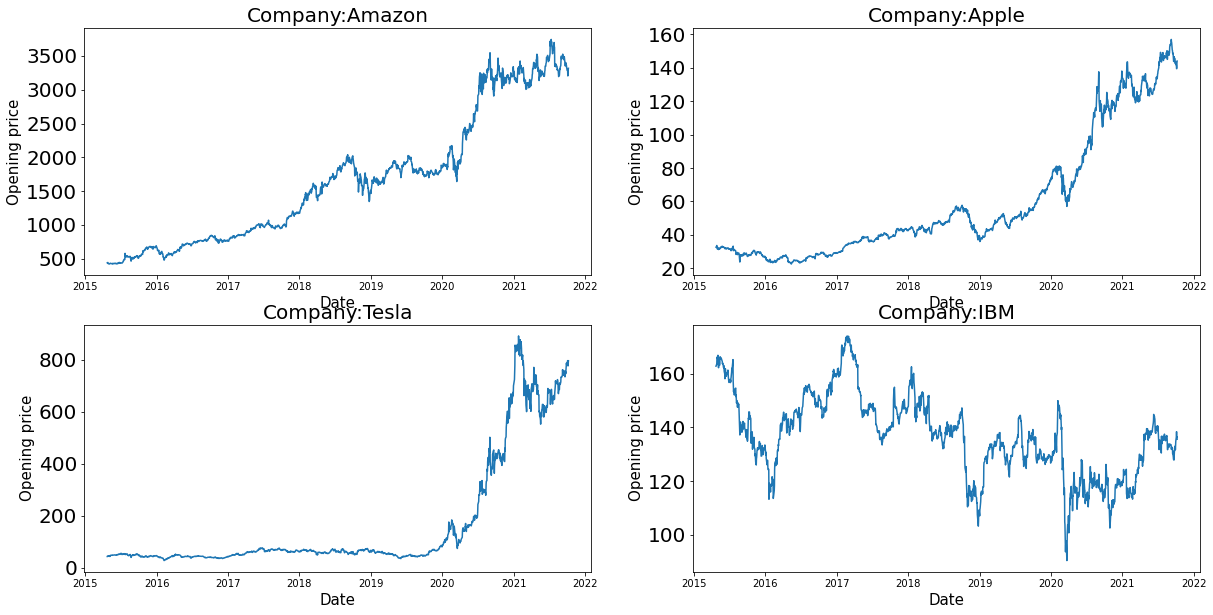

In [37]:
plt.figure(figsize = (20,10)) 
plt.subplot(2,2,1) 

plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(df['Open']['AMZN'])

plt.subplot(2,2,2) 
plt.title('Company:Apple',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(df['Open']['AAPL'])

plt.subplot(2,2,3) 
plt.title('Company:Tesla',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(df['Open']['TSLA'])

plt.subplot(2,2,4) 
plt.title('Company:IBM',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(df['Open']['IBM'])

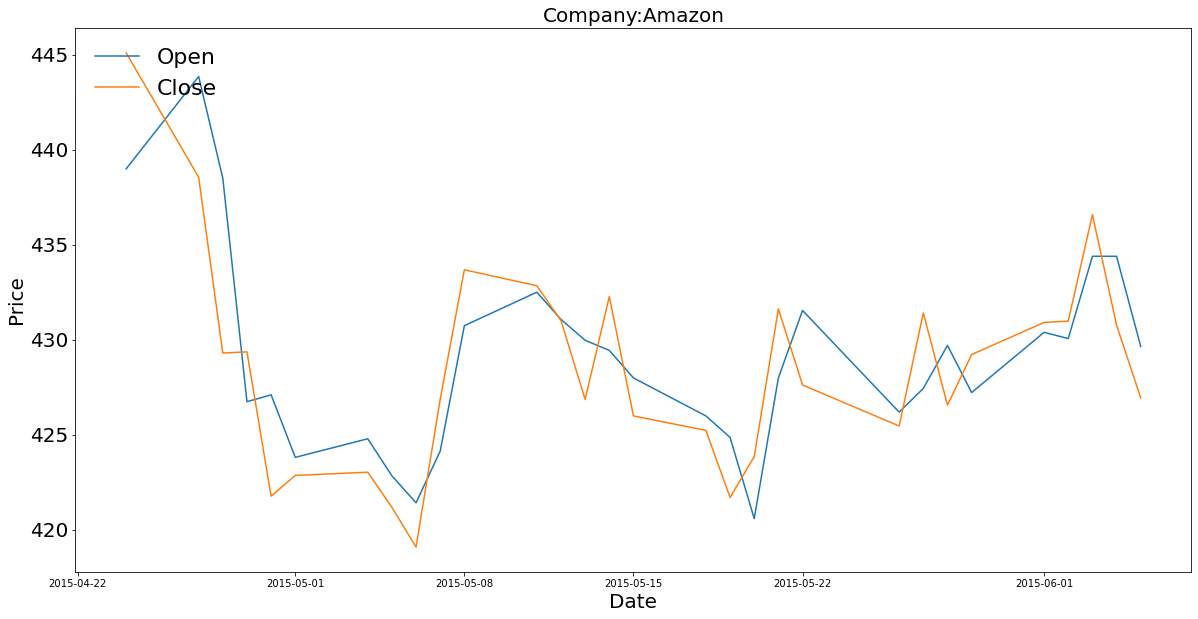

In [38]:
plt.figure(figsize = (20,10)) # Adjusting figure size
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Price',fontsize = 20)
plt.plot(df.iloc[0:30]['Open']['AMZN'],label = 'Open') # Opening prices of first 30 days are plotted against date
plt.plot(df.iloc[0:30]['Close']['AMZN'],label = 'Close') # Closing prices of first 30 days are plotted against date
plt.legend(loc='upper left', frameon=False,framealpha=1,prop={'size': 22}) # Properties of legend box

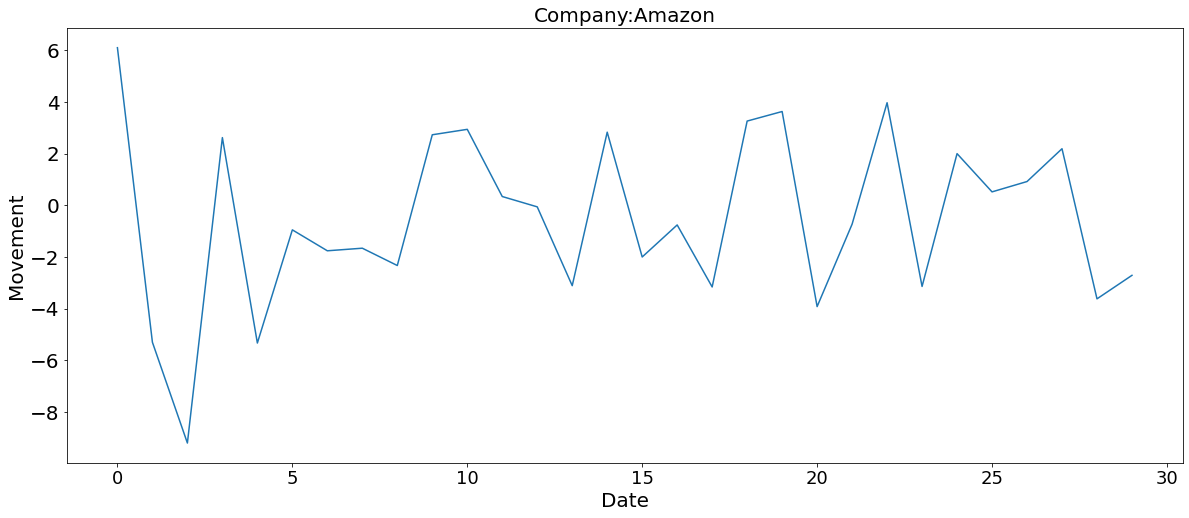

In [39]:
plt.figure(figsize = (20,8)) 
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[0][0:30])

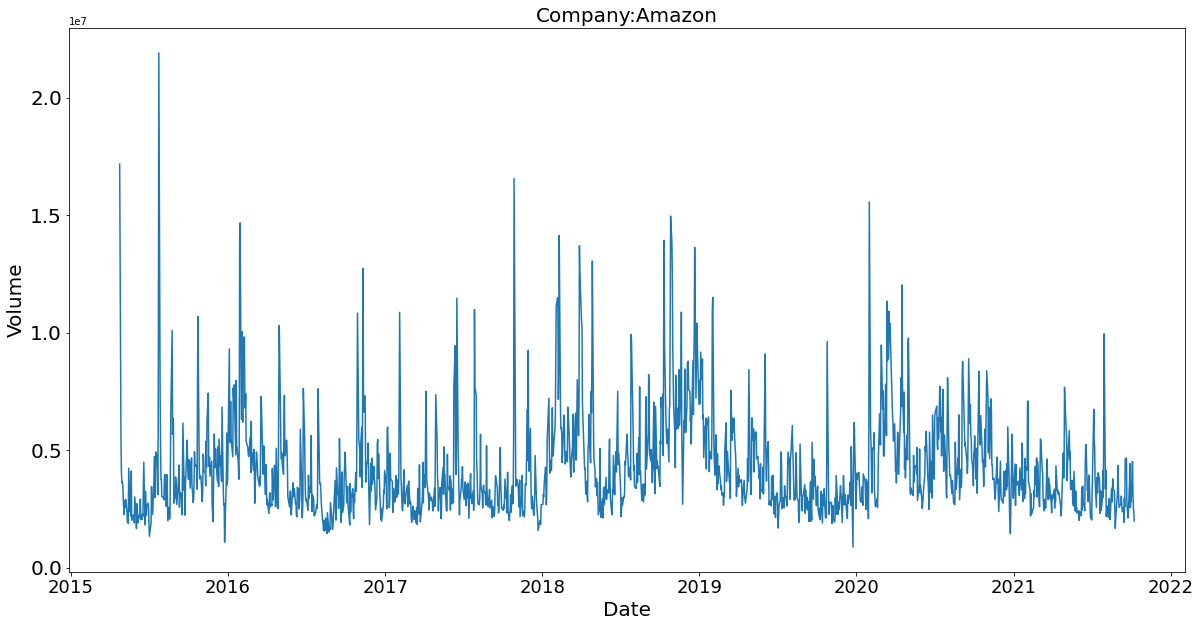

In [40]:
plt.figure(figsize = (20,10)) 
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Volume',fontsize = 20)
plt.plot(df['Volume']['AMZN'],label = 'Open')

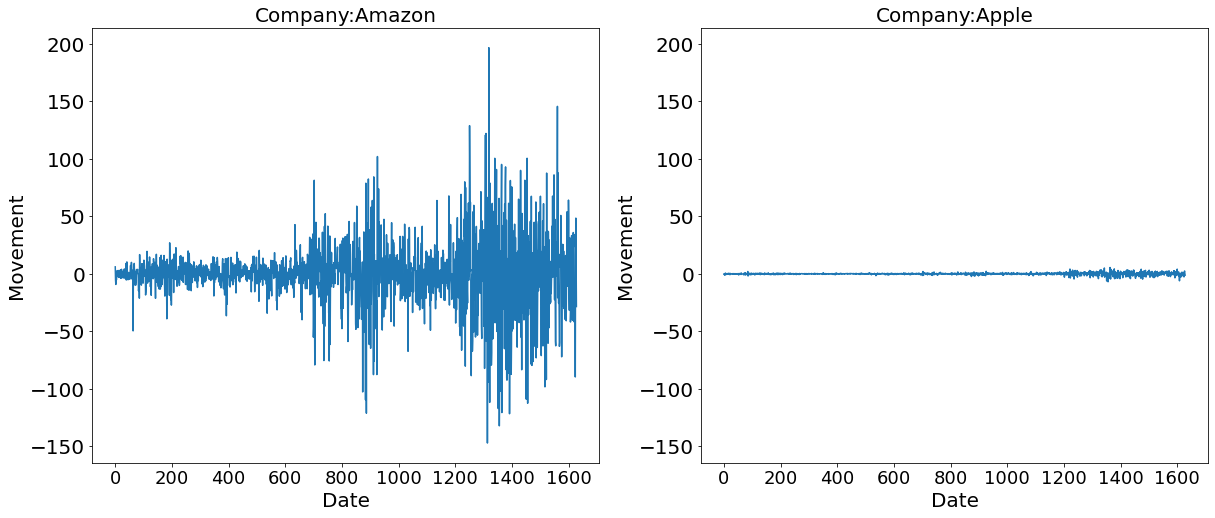

In [41]:
plt.figure(figsize = (20,8)) 
ax1 = plt.subplot(1,2,1)
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[0]) 
plt.subplot(1,2,2,sharey = ax1)
plt.title('Company:Apple',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[1])

### Data Normlization

In [42]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer() # Define a Normalizer
norm_movements = normalizer.fit_transform(movements) # Fit and transform

In [43]:
print(norm_movements.min())
print(norm_movements.max())
print(norm_movements.mean())

-0.2895498994580293
0.2267578241500342
-0.00018431556684564426


In [44]:
norm_movements.shape

(25, 1628)

### Elbow Method to find number of clusters

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


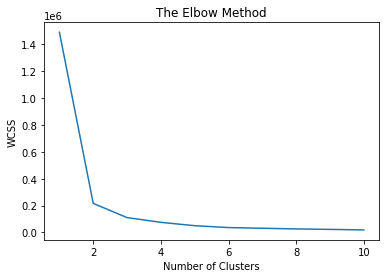

In [46]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(movements)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### Dimension Reduction-Principal Component Analysis(PCA) and K-Means with no. cluster = 3


In [53]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# Define a normalizer
normalizer = Normalizer()
# Reduce the data
reduced_data = PCA(n_components = 2)
# Create Kmeans model
kmeans = KMeans(n_clusters = 3,max_iter = 1000)
# Make a pipeline chaining normalizer, pca and kmeans
pipeline = make_pipeline(normalizer,reduced_data,kmeans)
# Fit pipeline to daily stock movements
pipeline.fit(movements)
# Prediction
predictions = pipeline.predict(movements)
# Create dataframe to store companies and predicted labels
df1 = pd.DataFrame({'labels':predictions,'companies':list(companies_dict.keys())}).sort_values(by=['labels'],axis = 0)

In [58]:
reduced_data

array([[ 0.54668144,  0.35877541],
       [ 0.49355428,  0.28389026],
       [-0.11961628, -0.13390142],
       [ 0.05703697, -0.48643891],
       [-0.1660434 ,  0.08514028],
       [ 0.05845752, -0.48049413],
       [ 0.12770477, -0.19537835],
       [ 0.21072292,  0.14879009],
       [-0.15093695, -0.11867017],
       [ 0.27534287,  0.20634205],
       [ 0.24063521,  0.06495723],
       [ 0.5198815 ,  0.13971142],
       [-0.35875097,  0.06084013],
       [-0.30355583,  0.0652222 ],
       [ 0.27857681, -0.49401405],
       [ 0.11346922, -0.4770996 ],
       [ 0.14867743, -0.44083276],
       [-0.12087898,  0.06443193],
       [-0.21515213,  0.06686972],
       [-0.44106937,  0.09862754],
       [-0.41080505,  0.12984047],
       [-0.37595919,  0.20101569],
       [-0.4103704 ,  0.22759089],
       [-0.3592933 ,  0.1258825 ],
       [ 0.36169093,  0.49890156]])

In [54]:
predictions

array([2, 2, 0, 1, 0, 1, 1, 2, 0, 2, 2, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 2])

In [55]:
df1

,labels,companies
12,0,General Electrics
13,0,American Express
23,0,Bank of America
18,0,Honda
19,0,Exxon
20,0,Chevron
21,0,Valero Energy
8,0,IBM
4,0,Boeing
2,0,Walgreen


### Plot the Decision Boundary

<Figure size 432x288 with 0 Axes>

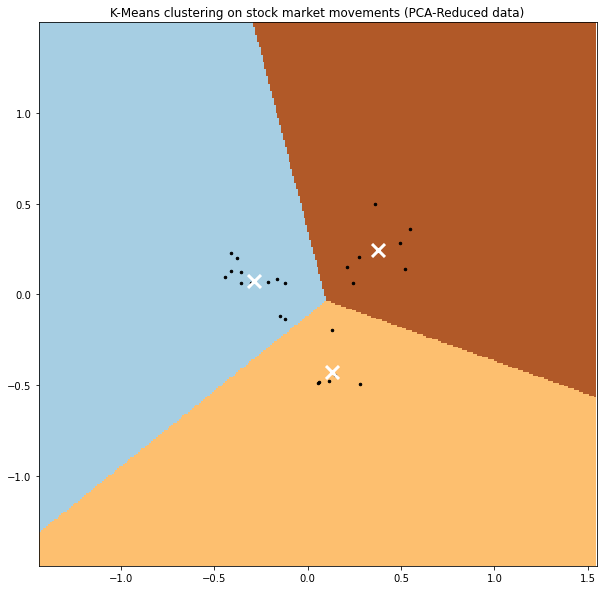

In [56]:
from sklearn.decomposition import PCA
# Reduce the data
reduced_data = PCA(n_components = 2).fit_transform(norm_movements)
# Define step size of mesh
h = 0.01
# Plot the decision boundary
x_min,x_max = reduced_data[:,0].min()-1, reduced_data[:,0].max() + 1
y_min,y_max = reduced_data[:,1].min()-1, reduced_data[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
# Obtain labels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# Define color plot
cmap = plt.cm.Paired
# Plotting figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z,interpolation = 'nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap = cmap,aspect = 'auto',origin = 'lower')
plt.plot(reduced_data[:,0],reduced_data[:,1],'k.',markersize = 5)
# Plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x',s = 169,linewidths = 3,color = 'w',zorder = 10)
plt.title('K-Means clustering on stock market movements (PCA-Reduced data)')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()